Copyright (C) Egon Kidmose 2015-2017

This file is part of lstm-rnn-correlation.

lstm-rnn-correlation is free software: you can redistribute it and/or
modify it under the terms of the GNU Lesser General Public License as
published by the Free Software Foundation, either version 3 of the
License, or (at your option) any later version.

lstm-rnn-correlation is distributed in the hope that it will be
useful, but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU
Lesser General Public License for more details.

You should have received a copy of the GNU Lesser General Public
License along with lstm-rnn-correlation. If not, see
<http://www.gnu.org/licenses/>.


In [1]:
import h5py
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import os
import subprocess
import itertools

fig_dir = os.path.expanduser('~/paper-reps/correlation2/figures')

def savefig(fig, fn):
    fn = os.path.join(fig_dir, fn)
    print('Saving to %s' % fn)
    fig.tight_layout()
    fig.savefig(
        fn,
        bbox_inches='tight',
    )
    # hack because for some reason matplolib use a long dash (non-UTF8) and pdflatex won't read it
    if fn.split('.')[-1] == 'pgf':
        subprocess.call(['sed', '-i', 's/\xe2\x88\x92/-/g', fn])

%matplotlib inline

In [2]:
# Define files to load metrics from
m_files = {
    'lstm-rnn': {
        'mcfp-own-merged': [
            'output/20180725-143658-slurm-1812956_0/20180725-143658-slurm-1812956_0-metrics.h5',
            'output/20180725-143658-slurm-1812956_1/20180725-143658-slurm-1812956_1-metrics.h5',
            'output/20180725-143658-slurm-1812956_2/20180725-143658-slurm-1812956_2-metrics.h5',
            'output/20180725-143658-slurm-1812956_3/20180725-143658-slurm-1812956_3-metrics.h5',
            'output/20180725-143658-slurm-1812956_4/20180725-143658-slurm-1812956_4-metrics.h5',
            'output/20180725-143657-slurm-1812956_5/20180725-143657-slurm-1812956_5-metrics.h5',
            'output/20180725-143658-slurm-1812956_6/20180725-143658-slurm-1812956_6-metrics.h5',
            'output/20180725-143658-slurm-1812956_7/20180725-143658-slurm-1812956_7-metrics.h5',
            'output/20180725-143657-slurm-1812956_8/20180725-143657-slurm-1812956_8-metrics.h5',
            'output/20180725-143657-slurm-1812956_9/20180725-143657-slurm-1812956_9-metrics.h5',
        ],
        'cic-ids-2017': [
            'output/20180725-143714-slurm-1812966_0/20180725-143714-slurm-1812966_0-metrics.h5',
            'output/20180725-143714-slurm-1812966_1/20180725-143714-slurm-1812966_1-metrics.h5',
            'output/20180725-143714-slurm-1812966_2/20180725-143714-slurm-1812966_2-metrics.h5',
            'output/20180725-143714-slurm-1812966_3/20180725-143714-slurm-1812966_3-metrics.h5',
            'output/20180725-143714-slurm-1812966_4/20180725-143714-slurm-1812966_4-metrics.h5',
            'output/20180725-143714-slurm-1812966_5/20180725-143714-slurm-1812966_5-metrics.h5',
            'output/20180725-143714-slurm-1812966_6/20180725-143714-slurm-1812966_6-metrics.h5',
            'output/20180725-143713-slurm-1812966_7/20180725-143713-slurm-1812966_7-metrics.h5',
            'output/20180725-143713-slurm-1812966_8/20180725-143713-slurm-1812966_8-metrics.h5',
            'output/20180725-143714-slurm-1812966_9/20180725-143714-slurm-1812966_9-metrics.h5',
        ],
    },
    'lsa': {
        'mcfp-own-merged': [
            'output/20180725-141455-slurm-1812906_0/20180725-141455-slurm-1812906_0-metrics.h5',
            'output/20180725-141632-slurm-1812906_1/20180725-141632-slurm-1812906_1-metrics.h5',
            'output/20180725-141455-slurm-1812906_2/20180725-141455-slurm-1812906_2-metrics.h5',
            'output/20180725-141455-slurm-1812906_3/20180725-141455-slurm-1812906_3-metrics.h5',
            'output/20180725-141632-slurm-1812906_4/20180725-141632-slurm-1812906_4-metrics.h5',
            'output/20180725-141632-slurm-1812906_5/20180725-141632-slurm-1812906_5-metrics.h5',
            'output/20180725-141507-slurm-1812906_6/20180725-141507-slurm-1812906_6-metrics.h5',
            'output/20180725-141632-slurm-1812906_7/20180725-141632-slurm-1812906_7-metrics.h5',
            'output/20180725-141632-slurm-1812906_8/20180725-141632-slurm-1812906_8-metrics.h5',
            'output/20180725-141632-slurm-1812906_9/20180725-141632-slurm-1812906_9-metrics.h5',
        ],
        'cic-ids-2017': [
            'output/20180725-120255-slurm-1812726_0/20180725-120255-slurm-1812726_0-metrics.h5',
            'output/20180725-120255-slurm-1812726_1/20180725-120255-slurm-1812726_1-metrics.h5',
            'output/20180725-120255-slurm-1812726_2/20180725-120255-slurm-1812726_2-metrics.h5',
            'output/20180725-120255-slurm-1812726_3/20180725-120255-slurm-1812726_3-metrics.h5',
            'output/20180725-120255-slurm-1812726_4/20180725-120255-slurm-1812726_4-metrics.h5',
            'output/20180725-120255-slurm-1812726_5/20180725-120255-slurm-1812726_5-metrics.h5',
            'output/20180725-120255-slurm-1812726_6/20180725-120255-slurm-1812726_6-metrics.h5',
            'output/20180725-120255-slurm-1812726_7/20180725-120255-slurm-1812726_7-metrics.h5',
            'output/20180725-120255-slurm-1812726_8/20180725-120255-slurm-1812726_8-metrics.h5',
            'output/20180725-120255-slurm-1812726_9/20180725-120255-slurm-1812726_9-metrics.h5',
        ]
    },
}

# Flatten and index by tuple:
m_files = {
    (method, dataset): filenames 
    for method, datasets in m_files.items() 
    for dataset, filenames in datasets.items()
}

In [3]:
# parameters for clustering
# Chosen based on IMR and ARF, seeking to optimize both
ps = {
    ('lsa', 'cic-ids-2017'): (6,0), # eps=0.1, minPts=1
    ('lsa', 'mcfp-own-merged'): (6,3), # eps=0.1, mintPts=30
    ('lstm-rnn', 'mcfp-own-merged'): (5,2), # eps=0.03, minPts=10
    ('lstm-rnn', 'cic-ids-2017'): (4,0), # eps=0.01, minPts=1
}

In [4]:
def h5read_array(filename, path):
    with h5py.File(filename) as f:
        return f[path][:]

def read_metric(metric, method, dataset, cut='validation'):
    return np.array([
        h5read_array(fn, '/{}/{}/'.format(metric, cut))[ps[method, dataset]]
        for fn in m_files[method, dataset]
    ])

In [5]:
# Domain specific metrics
df_domain = None
for (method, dataset) in m_files:
    df = pd.concat([
            pd.Series(read_metric('imr', method, dataset), name='IMR'),
            pd.Series(read_metric('arf', method, dataset), name='ARF'),
            pd.Series(read_metric('narf', method, dataset), name='NARF'),
        ], axis=1,
    )
    df['Method'] = method
    df['Data set'] = dataset
    
    df_domain = pd.concat([df_domain, df])

df_domain.groupby(['Method', 'Data set']).agg(['min', 'mean', 'max', ])




IMR                                    ARF  \
                               min          mean           max        min   
Method   Data set                                                           
lsa      cic-ids-2017     0.089286  9.932668e-02  1.639610e-01   4.194175   
         mcfp-own-merged  0.000000  7.256691e-17  1.327259e-16  21.550000   
lstm-rnn cic-ids-2017     0.000000  6.123999e-02  1.094014e-01   2.440678   
         mcfp-own-merged  0.000000  6.182598e-03  1.785714e-02   8.307692   

                                                    NARF                      
                               mean        max       min      mean       max  
Method   Data set                                                             
lsa      cic-ids-2017      4.545127   5.070588  0.007411  0.008233  0.009466  
         mcfp-own-merged  23.275389  25.411765  0.047791  0.051731  0.056640  
lstm-rnn cic-ids-2017      2.998225   3.393701  0.003343  0.004641  0.005567  
         mcfp-own-merged   9.247887   9.818182  0.016955  0.019154  0.020460

In [6]:
df_domain.groupby(['Method', 'Data set']).mean()

IMR        ARF      NARF
Method   Data set                                          
lsa      cic-ids-2017     9.932668e-02   4.545127  0.008233
         mcfp-own-merged  7.256691e-17  23.275389  0.051731
lstm-rnn cic-ids-2017     6.123999e-02   2.998225  0.004641
         mcfp-own-merged  6.182598e-03   9.247887  0.019154

Saving to /home/egk/paper-reps/correlation2/figures/metrics-domain.pgf
Saving to /home/egk/paper-reps/correlation2/figures/metrics-domain.pdf


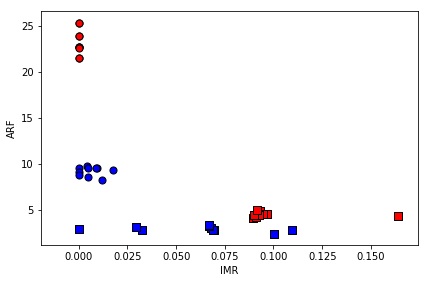

In [7]:
fig, ax = plt.subplots()

for m in ['lstm-rnn', 'lsa']:
    for d in ['mcfp-own-merged', 'cic-ids-2017']:
        idx = (df_domain['Method'] == m) & (df_domain['Data set'] == d)
        colour = 'red' if m == 'lsa' else 'blue' if m == 'lstm-rnn' else 'No colour for this method'
        marker = 'o' if d == 'mcfp-own-merged' else 's' if d == 'cic-ids-2017' else 'No marker for this data set'
        plt.scatter(
            df_domain.loc[idx,'IMR'],
            df_domain.loc[idx,'ARF'], 
            c=colour,
            s=50,
            marker=marker,
            edgecolors='k',
        )
        plt.xlabel('IMR')
        plt.ylabel('ARF')

savefig(fig, 'metrics-domain.pgf')
savefig(fig, 'metrics-domain.pdf')

In [29]:
# Classification metrics
df_classify = None
for (method, dataset) in m_files:
    df = pd.concat([
            pd.Series(read_metric('accuracy', method, dataset), name='Accuracy'),
            pd.Series(read_metric('precision', method, dataset), name='Precision'),
            pd.Series(read_metric('recall', method, dataset), name='Recall'),
            pd.Series(read_metric('f1', method, dataset), name='F1-score'),
        ], axis=1,
    )
    df['Method'] = method
    df['Data set'] = dataset
    
    df_classify = pd.concat([df_classify, df])

df_classify.groupby(['Method', 'Data set']).agg(['min', 'mean', 'max', ])


Accuracy                     Precision            \
                               min      mean       max       min      mean   
Method   Data set                                                            
lsa      cic-ids-2017     0.670534  0.693921  0.712963  0.724127  0.748034   
         mcfp-own-merged  0.800464  0.825520  0.847222  0.849548  0.864601   
lstm-rnn cic-ids-2017     0.296984  0.402899  0.456019  0.332133  0.401451   
         mcfp-own-merged  0.716937  0.737024  0.759259  0.709876  0.731214   

                                      Recall                      F1-score  \
                               max       min      mean       max       min   
Method   Data set                                                            
lsa      cic-ids-2017     0.761340  0.670534  0.693921  0.712963  0.627808   
         mcfp-own-merged  0.878550  0.800464  0.825520  0.847222  0.750619   
lstm-rnn cic-ids-2017     0.444172  0.296984  0.402899  0.456019  0.291882   
         mcfp-own-merged  0.752833  0.716937  0.737024  0.759259  0.702132   

                                              
                              mean       max  
Method   Data set                             
lsa      cic-ids-2017     0.648589  0.674221  
         mcfp-own-merged  0.793088  0.821413  
lstm-rnn cic-ids-2017     0.380742  0.424485  
         mcfp-own-merged  0.720063  0.740801

In [8]:
df_classify.groupby(['Method', 'Data set']).mean()

Accuracy  Precision    Recall  F1-score
Method   Data set                                                
lsa      cic-ids-2017     0.693921   0.748034  0.693921  0.648589
         mcfp-own-merged  0.825520   0.864601  0.825520  0.793088
lstm-rnn cic-ids-2017     0.402899   0.401451  0.402899  0.380742
         mcfp-own-merged  0.737024   0.731214  0.737024  0.720063

In [60]:
def read_per_class_metrics(method, dataset):
    dfs = list()
    for rep, fn in enumerate(m_files[method, dataset]):
        with h5py.File(fn) as f:
            group = f['/per_class/validation/index_%i_%i/' % ps[method, dataset]]
            dfs += [(
                pd.DataFrame({
                    k: v[:] for k, v in group.items()
                }),
                rep,
            )]
    return dfs
                

In [80]:
# Classification metrics, breakdown pr. class
def get_per_class_classification_performance(method, dataset):
    dfs_class_classify = read_per_class_metrics(method, dataset)

    def i_dont_rememeber_what_this_does(tup):
        # .. but in py3 lambdas can't unpack tuples for parameters,
        # so i needed a name when refactoring to use a named function
        df, rep = tup
        return pd.concat([
            df,
            pd.Series([rep for x in range(len(df.index))], index=df.index, name='repetition')
        ], axis=1)
     
    df_class_classify = pd.concat(map(
        i_dont_rememeber_what_this_does,
        dfs_class_classify,
    )).reset_index(drop=True)
    df_class_classify.loc[df_class_classify['labels']==-1, 'labels'] = 'Benign'

    # df_class_classify_agg = aggregate(df_class_classify[['precission', 'recall', 'f1', 'support']])
    # df_class_classify_agg

    df_class_classify_agg = df_class_classify[
        ['f1', 'precission', 'recall', 'support', 'labels']
    ].groupby(
        'labels'
    ).aggregate(
        ['mean', 'min', 'max']
    )
    
    df_class_classify_agg = pd.concat([
            df_class_classify_agg.reset_index(),
            df_class_classify[
                ['f1', 'precission', 'recall', 'support']
            ].groupby(
                lambda _ : 'Overall'
            ).agg(
                ['mean', 'min', 'max']
            ).reset_index().rename(columns={'index':'labels'})
    ]).set_index('labels')
    df_class_classify_agg
    
    return df_class_classify, df_class_classify_agg

for (method, dataset) in m_files:
    print('Per class classification performance for %s applied to %s:' % (method, dataset))
    _, df_class_classify_agg = get_per_class_classification_performance(method, dataset)
    with pd.option_context('display.width', 1000):
        print(df_class_classify_agg.round(3))
    print


Per class classification performance for lsa applied to cic-ids-2017:
            f1               precission               recall                support          
          mean    min    max       mean    min    max   mean    min    max     mean  min  max
labels                                                                                       
1        0.532  0.333  0.710      1.000  1.000  1.000  0.370  0.200  0.550   20.000   20   20
2        0.498  0.333  0.667      1.000  1.000  1.000  0.340  0.200  0.500   20.000   20   20
3        0.716  0.609  0.897      1.000  1.000  1.000  0.568  0.438  0.812   16.200   16   17
4        0.958  0.895  1.000      0.994  0.944  1.000  0.925  0.850  1.000   20.000   20   20
5        0.000  0.000  0.000      0.000  0.000  0.000  0.000  0.000  0.000   20.000   20   20
6        0.590  0.519  0.621      1.000  1.000  1.000  0.420  0.350  0.450   20.000   20   20
7        0.718  0.562  0.900      0.581  0.391  0.818  0.957  0.889  1.000    9.200 

Plot of per class classification performance for lsa applied to mcfp-own-merged:


/home/egk/git-reps/lstm-rnn-correlation/lsa-correlation/env/lib/python3.4/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


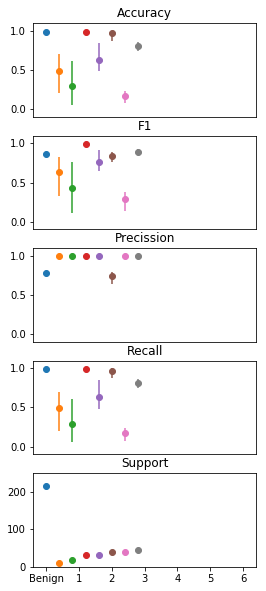

Plot of per class classification performance for lstm-rnn applied to mcfp-own-merged:


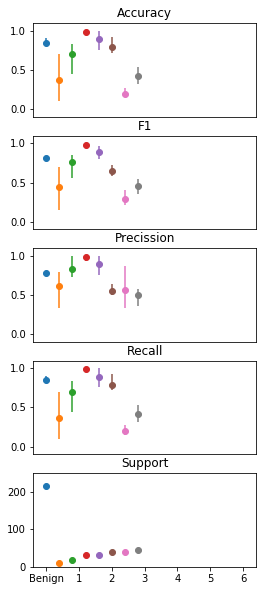

Plot of per class classification performance for lstm-rnn applied to cic-ids-2017:


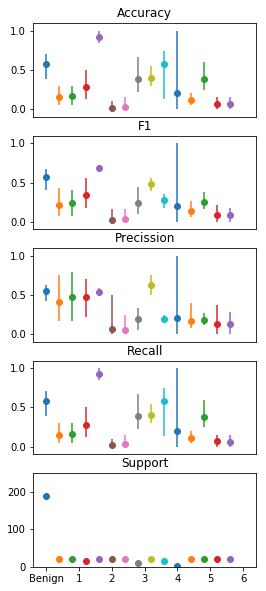

Plot of per class classification performance for lsa applied to cic-ids-2017:


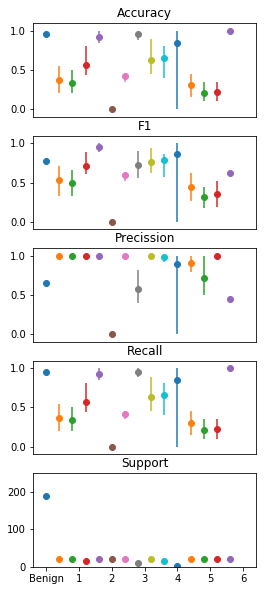

In [81]:
for (method, dataset) in m_files:
    print('Plot of per class classification performance for %s applied to %s:' % (method, dataset))
    df_class_classify, _ = get_per_class_classification_performance(method, dataset)

    ylims = {
        'support': [0, 250],
    }

    fig, axs = plt.subplots(nrows=5, ncols=1,figsize=(4, 10))
    for metric, ax in zip(['Accuracy', 'F1', 'Precission', 'Recall', 'Support',], axs):
        for i, incident in enumerate(df_class_classify['labels'].unique().tolist()):
            y = np.array(df_class_classify[df_class_classify['labels'] == incident][metric.lower()].tolist())
            x = np.ones_like(y)*i
            #ax.plot(x, y, 'x', markersize=5)
            ax.errorbar(
                i,
                y.mean(),
                yerr=[[y.mean()-y.min()], [y.max()-y.mean()]],
                fmt='--o',
            )
            ax.set_ylim(ylims.get(metric.lower(), [-0.1, 1.1]))
            ax.set_xlim([-1, 16])
            ax.set_title(metric)
        ax.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off') 

    axs[-1].tick_params(axis='x', which='major', bottom='on', top='off', labelbottom='on') 
    axs[-1].set_xticklabels([''] + df_class_classify['labels'].unique().tolist() + [''])
    plt.show()

In [83]:
for (method, dataset) in m_files:
    print('Saving plot of per class classification performance for %s applied to %s to tikz' % (method, dataset))
    df_class_classify, _ = get_per_class_classification_performance(method, dataset)
    
    res = """\\begin{tikzpicture}\n"""
    for i, metric in enumerate(['Accuracy', 'F1', 'Precission', 'Recall', 'Support',]):
        res += """\\begin{{axis}}[
        title={{{metric}}},
        name={name},
        height=4cm, width=8cm,
        {ylims}
        {ticks}
        {at}
      ]
      \\addplot+[
        only marks,
        black, mark options={{solid,fill=black}},
        error bars/.cd,
        y dir=both,y explicit
      ]
      coordinates {{\n""".format(
                metric=metric,
                name='ax'+str(i),
                at=('at=(ax'+str(i-1)+'.below south west), anchor=above north west,' if i>0 else '%'),
                ticks=('xmajorticks=false,' if metric!='Support'
                       else 'xtick={0,1,2,3,4,5,6,7,8,9}, xticklabels={Benign, 1, 2, 3, 4, 5, 6, 7, 8},'),
                ylims=('ymin=-0.1,ymax=1.1,' if metric!='Support' else 'ymin=0,ymax=250,'),
            )
        for x, incident in enumerate(df_class_classify['labels'].unique().tolist()):
            y = np.array(df_class_classify[df_class_classify['labels'] == incident][metric.lower()].tolist())
            res += "    ({},{}) -= (0,{}) += (0,{})\n".format(
                    x, y.mean(), y.mean()-y.min(), y.max()-y.mean()
            )
        res += """   };
    \end{axis}
    """
    res += """\\end{tikzpicture}"""
    dir = 'latex_output'
    with open('/home/egk/paper-reps/correlation2/figures/classification_%s_%s_tikz.tex' % (method, dataset), 'w') as f:
        f.write(res)

Saving plot of per class classification performance for lsa applied to cic-ids-2017 to tikz
Saving plot of per class classification performance for lsa applied to mcfp-own-merged to tikz
Saving plot of per class classification performance for lstm-rnn applied to mcfp-own-merged to tikz
Saving plot of per class classification performance for lstm-rnn applied to cic-ids-2017 to tikz


In [154]:
# confusion matrix
def read_confusion_matrix(method, dataset):
    res = []
    key = '/cm_inc_inc/validation/index_%i_%i/' % ps[method, dataset]
    for repetition, fn in enumerate(m_files[method, dataset]):
        conf_matrix = None
        try:
            conf_matrix = pd.read_hdf(fn, key)
        except ValueError as e:
            if 'unsupported pickle protocol: 4' in str(e):
                raise ValueError(e, 'Use the env of ./lsa-correlation/ to read this newer pickle version')
            
        res += [conf_matrix]
            
    return sum(res)

inc_inc_conf_mats = dict()
for (method, dataset) in m_files:
    inc_inc_conf_mats[method, dataset] = read_confusion_matrix(method, dataset)

Saving to /home/egk/paper-reps/correlation2/figures/confmat-lsa-mcfp-own-merged.pdf
Saving to /home/egk/paper-reps/correlation2/figures/confmat-lsa-mcfp-own-merged.pgf
Saving to /home/egk/paper-reps/correlation2/figures/confmat-lstm-rnn-mcfp-own-merged.pdf
Saving to /home/egk/paper-reps/correlation2/figures/confmat-lstm-rnn-mcfp-own-merged.pgf
Saving to /home/egk/paper-reps/correlation2/figures/confmat-lstm-rnn-cic-ids-2017.pdf
Saving to /home/egk/paper-reps/correlation2/figures/confmat-lstm-rnn-cic-ids-2017.pgf
Saving to /home/egk/paper-reps/correlation2/figures/confmat-lsa-cic-ids-2017.pdf
Saving to /home/egk/paper-reps/correlation2/figures/confmat-lsa-cic-ids-2017.pgf


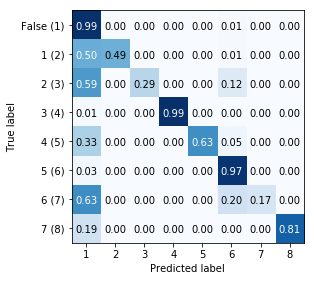

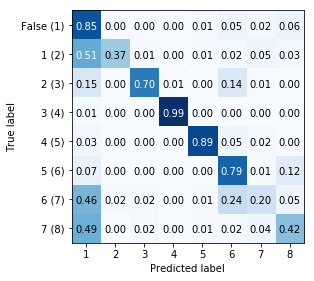

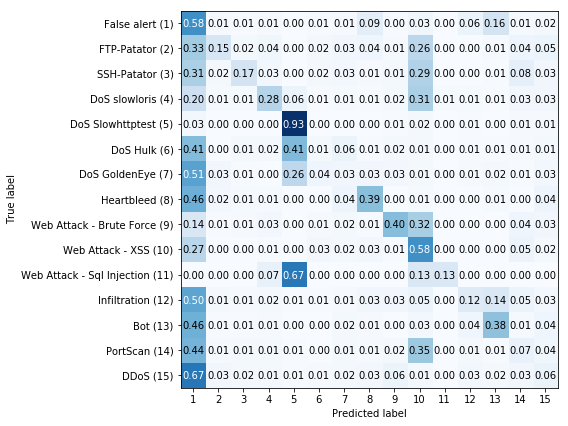

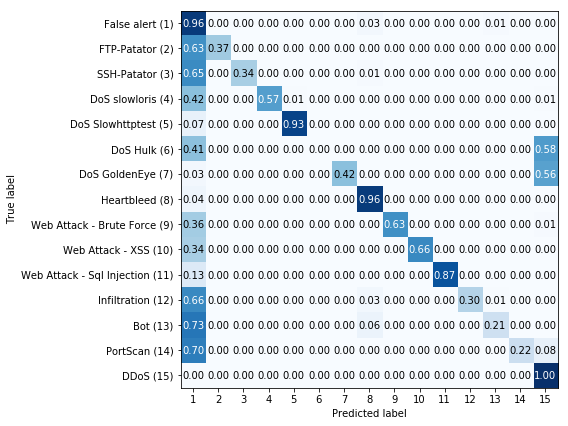

In [195]:
def plot_confusion_matrix(
    cm, classes,
    normalize=False,
    title='Confusion matrix',
    cmap=plt.cm.Blues
):
    """
    This function plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    tick_marks = np.arange(len(classes))
    x_classes = np.arange(1, len(classes)+1) # Only numbers
    plt.xticks(tick_marks, x_classes)
    y_classes = map(
    lambda tup : "%s (%s)" % tup,
        zip(classes, x_classes),
    )
    plt.yticks(tick_marks, y_classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i+0.15, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

for (method, dataset), conf_mat in inc_inc_conf_mats.items():
    # scale figure
    # default_figsize = (4, 6) # appears suitable for 8 classes
    # default_n_class = 8
    # figsize=tuple(np.array(default_figsize) * conf_mat.shape[0]/default_n_class) # Scale accordingly
    figsize = None
    if 'cic-ids-2017' in dataset:
        figsize = (8, 10)
    
    # classes
    cic_ids_2017_label_mapper = {
        'Bot': 12,
        'DDoS': 14,
        'DoS GoldenEye': 6,
        'DoS Hulk': 5,
        'DoS Slowhttptest': 4,
        'DoS slowloris': 3,
        'FTP-Patator': 1,
        'Heartbleed': 7,
        'Infiltration': 11,
        'PortScan': 13,
        'SSH-Patator': 2,
        'Web Attack - Brute Force': 8,
        'Web Attack - Sql Injection': 10,
        'Web Attack - XSS': 9,
    }
    cic_ids_2017_label_mapper = {v: k for k, v in cic_ids_2017_label_mapper.items()}
    cic_ids_2017_label_mapper['benign'] = 'False alert'
    mcfp_own_merged_mapper = {'benign': 'False'}
    label_mapper = {
        'mcfp-own-merged': mcfp_own_merged_mapper,
        'cic-ids-2017': cic_ids_2017_label_mapper,
    }
    classes = [label_mapper[dataset].get(v, v) for v in conf_mat.index.values]
    
    # Plot + save
    fig, ax = plt.subplots(figsize=figsize)
    plot_confusion_matrix(
        conf_mat.values, classes, 
        normalize=True,
    )
    savefig(fig, 'confmat-%s-%s.pdf' % (method, dataset))
    savefig(fig, 'confmat-%s-%s.pgf' % (method, dataset))

In [ ]:
# confusion matrix
print(sum([m['cm_inc_inc']['validation'][ps] for m in ms]).to_latex())

In [ ]:
# Classification metrics
df_classify = pd.concat([
        pd.Series([m['n_clusters']['validation'][ps] for m in ms], name='Clusters'),
        pd.Series([m['homogenity']['validation'][ps] for m in ms], name='Homogenity'),
        pd.Series([m['outliers']['validation'][ps] for m in ms], name='Outliers'),
        pd.Series([m['faro']['validation'][ps] for m in ms], name='FAR in outliers'),
        pd.Series([m['farc']['validation'][ps] for m in ms], name='FAR in clusters'),
    ], axis=1,
)
df_classify_agg = aggregate(df_classify)
df_classify_agg

In [ ]:
set(np.array([m['cm_inc_inc']['validation'][ps].as_matrix() for m in ms]).sum(axis=1).sum(axis=1))